# Compara os resultados da analise do designite e dos arquivos modificados

# Release: cassandra-3.11.11

## Configura ambiente

In [5]:
import pandas as pd
import util_designite

In [6]:
df_architecture_smells_v_3_11_11 = util_designite.init_df_architecture_smell_analysis(versao='3.11.11')
df_architecture_smells_v_3_11_11.head(3)

,Project Name,Package Name,Architecture Smell,Cause of the Smell
0,v-3-11-11,org.apache.cassandra.metrics,God Component,The tool detected the smell in this component ...
1,v-3-11-11,org.apache.cassandra.metrics,Cyclic Dependency,The tool detected the smell in this component ...
2,v-3-11-11,org.apache.cassandra.metrics,Cyclic Dependency,The tool detected the smell in this component ...


In [7]:
df_design_smells_v_3_11_11 = util_designite.init_df_design_smell_analysis(versao='3.11.11')
df_design_smells_v_3_11_11.head(3)

,Project Name,Package Name,Type Name,Design Smell,Cause of the Smell
0,v-3-11-11,org.apache.cassandra.metrics,LatencyMetrics,Unutilized Abstraction,The tool detected the smell in this class beca...
1,v-3-11-11,org.apache.cassandra.metrics,LatencyMetrics,Deficient Encapsulation,The tool detected the smell in this class beca...
2,v-3-11-11,org.apache.cassandra.metrics,BufferPoolMetrics,Unutilized Abstraction,The tool detected the smell in this class beca...


In [8]:
df_temp = df_design_smells_v_3_11_11.copy()
list_design_smell = list( df_temp['Design Smell'].unique() )
print(list_design_smell)


['Unutilized Abstraction', 'Deficient Encapsulation', 'Multifaceted Abstraction', 'Unnecessary Abstraction', 'Cyclically-dependent Modularization', 'Insufficient Modularization', 'Broken Modularization', 'Imperative Abstraction', 'Hub-like Modularization', 'Broken Hierarchy', 'Cyclic Hierarchy', 'Rebellious Hierarchy']


## --- Identificar os Architectural Smells ---

### 1. Quais registros correspondem a Cyclic Dependency?

### 1.1 Lista os pacotes que possuem dependência cíclica

#### Obs: O Designite java não mostra os arquivos (classes) com dependencia cíclica, só mostra os pacotes

In [9]:
list_cyclic_dependency_v_3_11_11 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_11_11, util_designite.texto_padrao_Cyclic_Dependency)

print('Fragmento...')
i = 1
for each in list_cyclic_dependency_v_3_11_11:
    if i < 10:
        print(f'{i} {each[2]}')
        i += 1
    else:
        break

print('...')

Fragmento...
1  org.apache.cassandra.metrics; org.apache.cassandra.utils.memory
2  org.apache.cassandra.metrics; org.apache.cassandra.utils.memory; org.apache.cassandra.db
3  org.apache.cassandra.metrics; org.apache.cassandra.utils.memory; org.apache.cassandra.utils.concurrent; org.apache.cassandra.utils
4  org.apache.cassandra.metrics; org.apache.cassandra.utils.memory; org.apache.cassandra.utils.concurrent; org.apache.cassandra.utils; org.apache.cassandra.db
5  org.apache.cassandra.tracing; org.apache.cassandra.concurrent
6  org.apache.cassandra.tracing; org.apache.cassandra.concurrent; org.apache.cassandra.service
7  org.apache.cassandra.locator; org.apache.cassandra.db
8  org.apache.cassandra.locator; org.apache.cassandra.gms; org.apache.cassandra.db
9  org.apache.cassandra.locator; org.apache.cassandra.gms; org.apache.cassandra.net; org.apache.cassandra.config
...


### 2. Quais registros correspondem a Feature Concentration?

### 2.1 Lista os arquivos que possem Feature Concentration

In [10]:
list_feature_concentration_v_3_11_11 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_11_11, util_designite.texto_padrao_Feature_Concentration)

print('Fragmento...')
i = 1
for each in list_feature_concentration_v_3_11_11:
    if i < 5:
        print(f'{i} {each[0]}, {each[2]}')
        i += 1
    else:
        break
print('...')

Fragmento...
1 org.apache.cassandra.metrics,  [LatencyMetrics]; [BufferPoolMetrics]; [MetricNameFactory; CassandraMetricsRegistry; DefaultNameFactory; ThreadPoolMetricNameFactory; KeyspaceMetrics; KeyspaceMetricNameFactory; ThreadPoolMetrics; TableMetrics; TableMetricNameFactory; AllTableMetricNameFactory]; [SEPMetrics]; [HintsServiceMetrics]; [DroppedMessageMetrics]; [CASClientRequestMetrics]; [ClientRequestMetrics]; [CompactionMetrics]; [ClearableHistogram]; [ViewWriteMetrics]; [ReadRepairMetrics]; [ConnectionMetrics]; [MessagingMetrics]; [ClientMetrics; AuthMetrics]; [CacheMetrics]; [StreamingMetrics]; [GetHistogram]; [TableHistogram]; [TableTimer]; [StorageMetrics]; [MetricMBean]; [AbstractBean]; [JmxGaugeMBean]; [JmxGauge]; [JmxHistogramMBean]; [JmxHistogram]; [JmxCounterMBean]; [JmxCounter]; [JmxMeterMBean]; [JmxMeter]; [JmxTimerMBean]; [JmxTimer]; [MetricName]; [HintedHandoffMetrics]; [DifferencingCounter]; [RestorableMeter; RestorableEWMA]; [DecayingEstimatedHistogramReservoir]

### 3. Quais registros correspondem a Unstable Dependency?

### 3.1 Lista os arquivos que possem Unstable Dependency

#### Obs: O Designite java não mostra os arquivos (classes) com dependencia instável, só mostra os pacotes

In [11]:
list_undatable_dependence_v_3_11_11 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_11_11, util_designite.texto_padrao_Unstable_Dependency)

print('Fragmento...')
i = 1
for each in list_undatable_dependence_v_3_11_11:
    if i < 10:
        print(f'{i} {each[0]}, {each[2]}')
        i += 1
    else: 
        break
print('...')

Fragmento...
1 org.apache.cassandra.metrics,  org.apache.cassandra.db.compaction; org.apache.cassandra.io.sstable.metadata; org.apache.cassandra.index
2 org.apache.cassandra.tracing,  org.apache.cassandra.db.marshal; org.apache.cassandra.db.partitions; org.apache.cassandra.db.rows; org.apache.cassandra.schema; org.apache.cassandra.service
3 org.apache.cassandra.tools,  org.apache.cassandra.tools.nodetool
4 org.apache.cassandra.tools.nodetool.stats,  org.apache.cassandra.metrics
5 org.apache.cassandra.net,  org.apache.cassandra.dht; org.apache.cassandra.repair.messages; org.apache.cassandra.gms; org.apache.cassandra.service.paxos; org.apache.cassandra.hints; org.apache.cassandra.batchlog; org.apache.cassandra.metrics; org.apache.cassandra.tracing; org.apache.cassandra.db.monitoring; org.apache.cassandra.service; org.apache.cassandra.db; org.apache.cassandra.streaming.messages; org.apache.cassandra.streaming
6 org.apache.cassandra.transport,  org.apache.cassandra.service; org.apache.cass

### 4. Quais registros correspondem a Scattered Functionality?

### 4.1 Lista os arquivos que possem Scattered Functionality

#### Obs: O Designite java não mostra os arquivos (classes) que possuem Scattered Functionality, só mostra os pacotes

In [12]:
list_Scattered_Functionality_v_3_11_11 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_11_11, util_designite.texto_padrao_Scattered_functionality)

print('Fragmento...')
i = 1
for each in list_Scattered_Functionality_v_3_11_11:
    if i < 10:
        print(f'{i} {each[0]}, {each[2]}')
        i += 1
    else:
        break
print('...')

Fragmento...
1 org.apache.cassandra.service.pager,  org.apache.cassandra.db; org.apache.cassandra.db.filter.
2 org.apache.cassandra.service.pager,  org.apache.cassandra.db.rows; org.apache.cassandra.utils.
3 org.apache.cassandra.service.pager,  org.apache.cassandra.db.filter; org.apache.cassandra.db.rows.
4 org.apache.cassandra.service.pager,  org.apache.cassandra.db.rows; org.apache.cassandra.db; org.apache.cassandra.db.filter.
...


### 5. Quais registros correspondem a Dense structure?

### 5.1 Lista os arquivos que possem Dense structure

#### Obs: O Designite java não mostra os arquivos (classes) que possem Dense structure, só mostra os pacotes

In [13]:
list_Dense_structure_v_3_11_11 = util_designite.extract_list_of_architecture_smells(df_architecture_smells_v_3_11_11, util_designite.texto_padrao_Dense_structure)

i = 1
for each in list_Dense_structure_v_3_11_11:
    print(f'{i} {each[0]}, {each[2]}')
    i += 1

1 <All packages>,   Average degree = 16.17. All the dependencies among components: from: org.apache.cassandra.metrics to: org.apache.cassandra.utils.memory; from: org.apache.cassandra.metrics to: org.apache.cassandra.net; from: org.apache.cassandra.metrics to: org.apache.cassandra.db.compaction; from: org.apache.cassandra.metrics to: org.apache.cassandra.config; from: org.apache.cassandra.metrics to: org.apache.cassandra.db; from: org.apache.cassandra.metrics to: org.apache.cassandra.io.sstable.format; from: org.apache.cassandra.metrics to: org.apache.cassandra.io.sstable.metadata; from: org.apache.cassandra.metrics to: org.apache.cassandra.index; from: org.apache.cassandra.metrics to: org.apache.cassandra.utils; from: org.apache.cassandra.metrics to: org.apache.cassandra.cql3; from: org.apache.cassandra.tracing to: org.apache.cassandra.concurrent; from: org.apache.cassandra.tracing to: org.apache.cassandra.utils; from: org.apache.cassandra.tracing to: org.apache.cassandra.utils.progre

## --- Identificar os Design Smells ---

### 1. Quais os registros correspondem a Broken Modularization?

In [14]:
list_Broken_modularization_v_3_11_11 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_11_11, 'Broken Modularization')

i = 1
for each in list_Broken_modularization_v_3_11_11:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.metrics, StorageMetrics
2 org.apache.cassandra.tools.nodetool.stats, StatsTable
3 org.apache.cassandra.config, RequestSchedulerOptions
4 org.apache.cassandra.thrift, Args


### 2. Quais os registros correspondem a Cyclically-dependent modularization

In [15]:
list_Cyclically_dependent_modularization_v_3_11_11 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_11_11, 'Cyclically-dependent Modularization')

i = 1
for each in list_Cyclically_dependent_modularization_v_3_11_11:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.metrics, CompactionMetrics
2 org.apache.cassandra.tracing, Tracing
3 org.apache.cassandra.locator, TokenMetadata
4 org.apache.cassandra.net, MessagingService
5 org.apache.cassandra.transport, Message
6 org.apache.cassandra.transport, CBUtil
7 org.apache.cassandra.transport.messages, ResultMessage
8 org.apache.cassandra.cql3, AssignmentTestable
9 org.apache.cassandra.cql3, Tuples
10 org.apache.cassandra.cql3.restrictions, StatementRestrictions
11 org.apache.cassandra.cql3.statements, SelectStatement
12 org.apache.cassandra.cql3.selection, SelectionColumnMapping
13 org.apache.cassandra.cache, AutoSavingCache
14 org.apache.cassandra.config, Schema
15 org.apache.cassandra.security, SSLFactory
16 org.apache.cassandra.auth, DataResource
17 org.apache.cassandra.triggers, TriggerExecutor
18 org.apache.cassandra.dht, RangeStreamer
19 org.apache.cassandra.io.sstable, SSTable
20 org.apache.cassandra.io.sstable.format, SSTableReader
21 org.apache.cassandra.io.sstable.format.

### 3. Quais os registros correspondem a Hub-Like Modularization?

In [16]:
list_Cyclically_Hub_like_modularization_v_3_11_11 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_11_11, 'Hub-like Modularization',)

i = 1
for each in list_Cyclically_Hub_like_modularization_v_3_11_11:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.net, MessagingService
2 org.apache.cassandra.io.sstable.format, SSTableReader
3 org.apache.cassandra.db, SinglePartitionReadCommand
4 org.apache.cassandra.db, ColumnFamilyStore
5 org.apache.cassandra.db, LegacyLayout
6 org.apache.cassandra.db.compaction, CompactionManager
7 org.apache.cassandra.service, StorageService


### 4. Quais os registros correspondem a Insufficient Modularization?

In [17]:
list_Insufficient_modularization_v_3_11_11 = util_designite.extract_list_of_design_smells(df_design_smells_v_3_11_11, 'Insufficient Modularization')

i = 1
for each in list_Insufficient_modularization_v_3_11_11:
    print(f'{i} {each[0]}, {each[1]}')
    i += 1

1 org.apache.cassandra.metrics, TableMetrics
2 org.apache.cassandra.metrics, CassandraMetricsRegistry
3 org.apache.cassandra.metrics, KeyspaceMetrics
4 org.apache.cassandra.tracing, Tracing
5 org.apache.cassandra.locator, TokenMetadata
6 org.apache.cassandra.locator, DynamicEndpointSnitch
7 org.apache.cassandra.tools, LoaderOptions
8 org.apache.cassandra.tools, Builder
9 org.apache.cassandra.tools, NodeProbe
10 org.apache.cassandra.net, MessagingService
11 org.apache.cassandra.transport, Message
12 org.apache.cassandra.transport, CBUtil
13 org.apache.cassandra.transport, Event
14 org.apache.cassandra.transport, Server
15 org.apache.cassandra.transport, EventNotifier
16 org.apache.cassandra.transport, SimpleClient
17 org.apache.cassandra.transport.messages, ResultMessage
18 org.apache.cassandra.cql3, Sets
19 org.apache.cassandra.cql3, Duration
20 org.apache.cassandra.cql3, Maps
21 org.apache.cassandra.cql3, Tuples
22 org.apache.cassandra.cql3, CQL3Type
23 org.apache.cassandra.cql3, Raw


## --- Registros referentes aos Arquivos mais modificados na versão 3.11.11 ---

In [18]:
df_arquivos_modificados_v_3_11_11 = util_designite.init_df_100_arquivos_mais_modificados(versao='3.11.11')
df_arquivos_modificados_v_3_11_11.sort_values(['name', 'date', 'hash']).head(3)

,Unnamed: 0,index,name,hash,date,added_lines,deleted_lines,modifications,old_path,new_path,change_type,nloc,complexity
1337,1337,1337,AbstractCluster.java,c100f1ac40137a0d6d0793930cdfce3845880a12,2018-12-18 14:20:52,406,0,406,NaN,test/distributed/org/apache/cassandra/distribu...,ADD,287.0,55.0
1338,1338,1338,AbstractCluster.java,a7d8ba7b10a441f9710724e65a939a46add0ae78,2019-02-11 15:37:07,20,10,30,test/distributed/org/apache/cassandra/distribu...,test/distributed/org/apache/cassandra/distribu...,MODIFY,297.0,55.0
1339,1339,1339,AbstractCluster.java,7d2c3c215f65ee41f86886304257647fc24b1f70,2019-04-04 14:39:57,17,1,18,test/distributed/org/apache/cassandra/distribu...,test/distributed/org/apache/cassandra/distribu...,MODIFY,311.0,59.0


In [19]:
dictionary_filename_modifications_v_3_11_11 = util_designite.generate_dictionary_filename_modifications(df_arquivos_modificados_v_3_11_11)

print('Fragmento...')

i = 0
for k, v in dictionary_filename_modifications_v_3_11_11.items():
    if i < 10:
        print(k, v)
        i += 1
    else:
        break
print('...')

Fragmento...
AbstractCluster.java [('c100f1ac40137a0d6d0793930cdfce3845880a12', '2018-12-18 14:20:52', 406, 287.0, 55.0), ('a7d8ba7b10a441f9710724e65a939a46add0ae78', '2019-02-11 15:37:07', 30, 297.0, 55.0), ('7d2c3c215f65ee41f86886304257647fc24b1f70', '2019-04-04 14:39:57', 18, 311.0, 59.0), ('527514109469b925ee310abf06848c8eb484da13', '2019-04-25 15:18:07', 2, 311.0, 59.0), ('e4b5d9818f003be2b9091c48f8435d29202ffe2d', '2019-05-02 17:24:43', 58, 335.0, 64.0), ('8dcaa12baa97ce870f23ff9045f968f2fa28b2cc', '2019-08-15 10:12:06', 138, 356.0, 69.0), ('58a5ce14ba80a0a4eeef0f6b18e58d63113e1159', '2019-08-26 15:07:44', 151, 458.0, 95.0), ('50b7094278241f389d3b0b49b02e893fd4322b12', '2019-10-14 13:42:35', 158, 535.0, 112.0), ('5459c121d5d688ec1571dd72550bd6faaeb087eb', '2019-11-18 11:39:45', 6, 539.0, 113.0), ('563592801aad00e002f0a162d5e2625a4b0e8723', '2019-12-11 21:33:24', 3, 540.0, 113.0), ('b2f2c70e26a32253b0e58ee197c2f8abf01dd449', '2020-01-15 17:18:46', 17, 549.0, 114.0), ('9705d823cddf

### Exemplo: detalhes das modificacoes do arquivo StorageService.java

In [20]:
print(dictionary_filename_modifications_v_3_11_11['StorageService.java'])

[('6bad57fc3cf967838a220d8402db37ed9a5b3b4e', '2015-11-11 15:02:26', 65, 3306.0, 717.0), ('6bb6bb005197c33fa94026d472ff78d4f36613cc', '2015-11-11 15:04:25', 65, 3302.0, 703.0), ('9a90e9894e9e079058876cf2b16a47d29ba0a32a', '2015-11-11 15:05:35', 61, 3344.0, 718.0), ('ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb', '2015-11-10 17:22:11', 6, 3311.0, 718.0), ('a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7', '2015-10-29 12:36:32', 3, 3314.0, 719.0), ('99b82dbb43277035562e7b82bb9bdebd84510e96', '2015-11-10 13:08:05', 9, 3311.0, 705.0), ('ae315b5ec944571342146867c51b2ceb50f3845e', '2015-11-16 15:48:33', 9, 3351.0, 720.0), ('7650fc196341bd673626054593f2ce6e895d7783', '2015-11-27 13:49:15', 32, 3333.0, 726.0), ('51753263a4c4d50c5bbe7bb80636cca5b6458ecf', '2015-12-01 10:41:05', 14, 3333.0, 726.0), ('15f03ab446854cf4d2999c3785d145c89bc3a3e4', '2015-11-25 16:45:02', 19, 3319.0, 710.0), ('9135340a13531930f26fb8175b057342791ff044', '2015-10-08 12:13:28', 40, 3336.0, 727.0), ('94c361d1a7a63490f1b66f5b10e025795

In [21]:
df_x_tempo_modifications = util_designite.generate_df_file_tempo_modifications('StorageService.java', dictionary_filename_modifications_v_3_11_11)
df_x_tempo_modifications = df_x_tempo_modifications.sort_values(['tempo'])

df_x_tempo_loc = util_designite.generate_df_file_tempo_loc('StorageService.java', dictionary_filename_modifications_v_3_11_11)
df_x_tempo_loc = df_x_tempo_loc.sort_values(['tempo'])

df_x_tempo_complexidade = util_designite.generate_df_file_tempo_complexidade('StorageService.java', dictionary_filename_modifications_v_3_11_11)
df_x_tempo_complexidade = df_x_tempo_complexidade.sort_values(['tempo'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='tempo'>

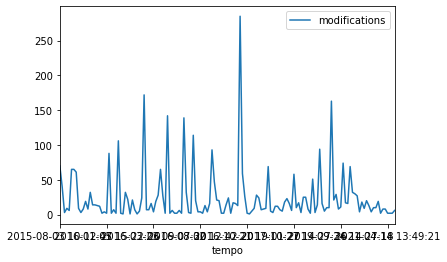

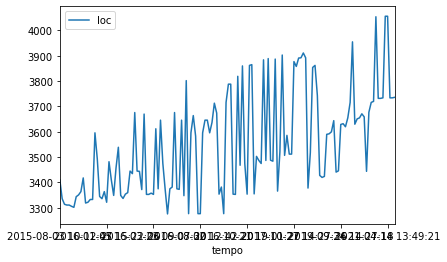

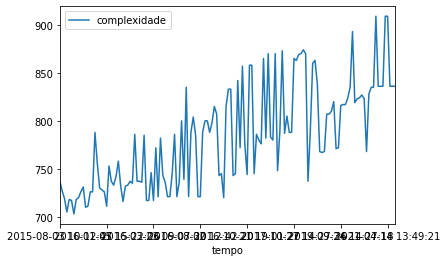

In [39]:
df_x_tempo_modifications.plot('tempo', 'modifications')
df_x_tempo_loc.plot('tempo', 'loc')
df_x_tempo_complexidade.plot('tempo', 'complexidade')

### Pega os 100 arquivos mais modificados na versão analisada

In [23]:
df_nomes_100_arquivos_mais_modificados = pd.read_csv(filepath_or_buffer=util_designite.PATH_ARQUIVOS_MODIFICADOS_V_3_11_11 + '/' + 'pega_100_arquivos_mais_modificados.csv', sep=',', encoding='utf-8')
df_nomes_100_arquivos_mais_modificados.sort_values(by=['modifications'], ascending=False, inplace=True)
df_nomes_100_arquivos_mais_modificados.head(20)

,file,modifications
0,StorageService.java,144
1,ColumnFamilyStore.java,89
2,DatabaseDescriptor.java,87
3,CompactionManager.java,74
4,StorageProxy.java,53
5,SSTableReader.java,53
6,Config.java,52
7,CassandraDaemon.java,51
8,SelectStatement.java,44
9,LegacyLayout.java,42


In [24]:
lista_100_arquivos_mais_moficads = []

for index, row in df_nomes_100_arquivos_mais_modificados.iterrows():
    lista_100_arquivos_mais_moficads.append(row['file'])

print(lista_100_arquivos_mais_moficads)

['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java', 'Config.java', 'CassandraDaemon.java', 'SelectStatement.java', 'LegacyLayout.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'Instance.java', 'MessagingService.java', 'ReadCommand.java', 'Gossiper.java', 'CQLTester.java', 'CFMetaData.java', 'SchemaKeyspace.java', 'SecondaryIndexTest.java', 'ViewTest.java', 'SystemKeyspace.java', 'StorageServiceMBean.java', 'SASIIndexTest.java', 'CompactionStrategyManager.java', 'DataResolver.java', 'View.java', 'ModificationStatement.java', 'ColumnIndex.java', 'Keyspace.java', 'StatementRestrictions.java', 'AbstractCluster.java', 'FBUtilities.java', 'QueryProcessor.java', 'SelectTest.java', 'AlterTest.java', 'CreateViewStatement.java', 'CommitLogReplayer.java', 'Directories.java', 'BatchStatement.java', 'AlterTableStatement.java', 'ActiveRepairService.java', 'Scrubber.java', 'SecondaryIndexManager

In [25]:
list_of_arquivos_modificados_3_11_11 = util_designite.extract_list_of_arquivos_modifiados(df_arquivos_modificados_v_3_11_11)

print('Fragmento...')
i = 1
for each in list_of_arquivos_modificados_3_11_11:
    if i < 200:
        print(each[1], each[2], each[3], each[5], each[6], each[7])
        i += 1
print('...')

Fragmento...
StorageService.java 6bad57fc3cf967838a220d8402db37ed9a5b3b4e 65 3306.0 717.0 org.apache.cassandra.service
StorageService.java 6bb6bb005197c33fa94026d472ff78d4f36613cc 65 3302.0 703.0 org.apache.cassandra.service
StorageService.java 9a90e9894e9e079058876cf2b16a47d29ba0a32a 61 3344.0 718.0 org.apache.cassandra.service
StorageService.java ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb 6 3311.0 718.0 org.apache.cassandra.service
StorageService.java a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7 3 3314.0 719.0 org.apache.cassandra.service
StorageService.java 99b82dbb43277035562e7b82bb9bdebd84510e96 9 3311.0 705.0 org.apache.cassandra.service
StorageService.java ae315b5ec944571342146867c51b2ceb50f3845e 9 3351.0 720.0 org.apache.cassandra.service
StorageService.java 7650fc196341bd673626054593f2ce6e895d7783 32 3333.0 726.0 org.apache.cassandra.service
StorageService.java 51753263a4c4d50c5bbe7bb80636cca5b6458ecf 14 3333.0 726.0 org.apache.cassandra.service
StorageService.java 15f03ab446854cf4d

# --- Resultados Architectural Smells ---

## Procura pelos arquivos modificados que tem dependencia cíclica de pacotes

In [26]:
lista_pacotes_com_dependencia_ciclica = []
i = 1
for each in list_cyclic_dependency_v_3_11_11:
    elemento = each[2]
    elemento = elemento.replace(' ', '')
    elemento = elemento.replace(';', ',')
    lista_pacotes_com_dependencia_ciclica.append(elemento)
    i += 1

lista_pacotes_com_dependencia_ciclica

['org.apache.cassandra.metrics,org.apache.cassandra.utils.memory',
 'org.apache.cassandra.metrics,org.apache.cassandra.utils.memory,org.apache.cassandra.db',
 'org.apache.cassandra.metrics,org.apache.cassandra.utils.memory,org.apache.cassandra.utils.concurrent,org.apache.cassandra.utils',
 'org.apache.cassandra.metrics,org.apache.cassandra.utils.memory,org.apache.cassandra.utils.concurrent,org.apache.cassandra.utils,org.apache.cassandra.db',
 'org.apache.cassandra.tracing,org.apache.cassandra.concurrent',
 'org.apache.cassandra.tracing,org.apache.cassandra.concurrent,org.apache.cassandra.service',
 'org.apache.cassandra.locator,org.apache.cassandra.db',
 'org.apache.cassandra.locator,org.apache.cassandra.gms,org.apache.cassandra.db',
 'org.apache.cassandra.locator,org.apache.cassandra.gms,org.apache.cassandra.net,org.apache.cassandra.config',
 'org.apache.cassandra.locator,org.apache.cassandra.gms,org.apache.cassandra.net,org.apache.cassandra.dht,org.apache.cassandra.service',
 'org.ap

## Procura os arquivos modificados que possuem Feature Concentration

In [27]:
lista_arquivos_modificados_com_feature_concentration = []

for each_am in list_of_arquivos_modificados_3_11_11:
    elemento_am = each_am[1]
    elemento_am = elemento_am.replace('.java', '')    
    for each_fc in list_feature_concentration_v_3_11_11:
        pacote_fc = each_fc[0]
        elemento_fc = each_fc[2]
        if elemento_am in elemento_fc:
            conteudo = (pacote_fc, each_am[1])
            lista_arquivos_modificados_com_feature_concentration.append(conteudo)

lista_arquivos_modificados_com_feature_concentration = list(set(lista_arquivos_modificados_com_feature_concentration) )
print(f'Tamanho: {len(lista_arquivos_modificados_com_feature_concentration)}, {lista_arquivos_modificados_com_feature_concentration}')

Tamanho: 151, [('org.apache.cassandra.notifications', 'Memtable.java'), ('org.apache.cassandra.tools', 'JsonTransformer.java'), ('org.apache.cassandra.metrics', 'TableMetrics.java'), ('org.apache.cassandra.db.compaction', 'CompactionController.java'), ('org.apache.cassandra.repair', 'Keyspace.java'), ('org.apache.cassandra.service', 'DataResolver.java'), ('org.apache.cassandra.io.sstable.format', 'Instance.java'), ('org.apache.cassandra.thrift', 'CassandraServer.java'), ('org.apache.cassandra.db', 'CommitLog.java'), ('org.apache.cassandra.service', 'MigrationManager.java'), ('org.apache.cassandra.db.rows', 'UnfilteredSerializer.java'), ('org.apache.cassandra.service', 'ActiveRepairService.java'), ('org.apache.cassandra.db', 'ColumnFamilyStore.java'), ('org.apache.cassandra.db.view', 'View.java'), ('org.apache.cassandra.streaming.compress', 'StreamReader.java'), ('org.apache.cassandra.db', 'Schema.java'), ('org.apache.cassandra.cql3', 'QueryProcessor.java'), ('org.apache.cassandra.io.ut

In [28]:
lista_nomes_arquivos_com_feature_concentration = []

for each in lista_arquivos_modificados_com_feature_concentration:
    pacote = each[0]
    arquivo = each[1]
    lista_nomes_arquivos_com_feature_concentration.append(arquivo)

print(lista_nomes_arquivos_com_feature_concentration)

['Memtable.java', 'JsonTransformer.java', 'TableMetrics.java', 'CompactionController.java', 'Keyspace.java', 'DataResolver.java', 'Instance.java', 'CassandraServer.java', 'CommitLog.java', 'MigrationManager.java', 'UnfilteredSerializer.java', 'ActiveRepairService.java', 'ColumnFamilyStore.java', 'View.java', 'StreamReader.java', 'Schema.java', 'QueryProcessor.java', 'FileUtils.java', 'SSTableReader.java', 'DataOutputBuffer.java', 'StorageProxy.java', 'CFMetaData.java', 'Keyspace.java', 'PartitionUpdate.java', 'Operation.java', 'AbstractCluster.java', 'UnfilteredDeserializer.java', 'CompactionStrategyManager.java', 'Message.java', 'Message.java', 'AlterTableStatement.java', 'CQLSSTableWriter.java', 'StartupChecks.java', 'View.java', 'Config.java', 'Message.java', 'Scrubber.java', 'Keyspace.java', 'Util.java', 'DatabaseDescriptor.java', 'Util.java', 'ViewBuilder.java', 'CreateViewStatement.java', 'SelectStatement.java', 'CommitLog.java', 'PartitionUpdate.java', 'RowFilter.java', 'Config.

In [29]:
lista_temp = []
for each in lista_100_arquivos_mais_moficads:
    # checa se esta na lista de arquivos com feature concentration
    if each in lista_nomes_arquivos_com_feature_concentration:
        lista_temp.append(each)

print(f'Dos 100 arquivos mais modificados, {len(lista_temp)} apresentam Architectural Smell de feature concentration: {lista_temp}')

Dos 100 arquivos mais modificados, 80 apresentam Architectural Smell de feature concentration: ['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java', 'Config.java', 'CassandraDaemon.java', 'SelectStatement.java', 'LegacyLayout.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'Instance.java', 'MessagingService.java', 'ReadCommand.java', 'Gossiper.java', 'CFMetaData.java', 'SchemaKeyspace.java', 'SystemKeyspace.java', 'StorageServiceMBean.java', 'CompactionStrategyManager.java', 'DataResolver.java', 'View.java', 'ModificationStatement.java', 'ColumnIndex.java', 'Keyspace.java', 'StatementRestrictions.java', 'AbstractCluster.java', 'FBUtilities.java', 'QueryProcessor.java', 'CreateViewStatement.java', 'CommitLogReplayer.java', 'Directories.java', 'BatchStatement.java', 'AlterTableStatement.java', 'ActiveRepairService.java', 'Scrubber.java', 'SecondaryIndexManager.java', 'BigTableWriter.ja

# --- Resultados Design Smells --- 

## Procura pelos arquivos que tem Broken Modularization


In [30]:
print(list_of_arquivos_modificados_3_11_11[0])

(0, 'StorageService.java', '6bad57fc3cf967838a220d8402db37ed9a5b3b4e', 65, 'MODIFY', 3306.0, 717.0, 'org.apache.cassandra.service')


In [31]:
print(len(list_Broken_modularization_v_3_11_11))

4


In [32]:
lista_arquivos_modificados_com_broken_modularization = []

lista_nomes_bm = []

for each_am in list_of_arquivos_modificados_3_11_11:
    elemento_am = each_am[1]
    elemento_am = elemento_am.replace('.java', '')    
    for each_bm in list_Broken_modularization_v_3_11_11:
        pacote_bm = each_bm[0]
        elemento_bm = each_bm[1]
        if elemento_bm not in lista_nomes_bm:
            lista_nomes_bm.append(elemento_bm)
        if elemento_am == elemento_bm:
            conteudo = (pacote_bm, each_am[1])
            lista_arquivos_modificados_com_broken_modularization.append(conteudo)

lista_arquivos_modificados_com_broken_modularization = list(set(lista_arquivos_modificados_com_broken_modularization) )
print(f'Tamanho: {len(lista_arquivos_modificados_com_broken_modularization)}, {lista_arquivos_modificados_com_broken_modularization}')

if len(lista_arquivos_modificados_com_broken_modularization) == 0:
    print(f'Dos {len(list_Broken_modularization_v_3_11_11)} arquivos ({lista_nomes_bm}) com DS Broken Modularization nenhum aparece na lista dos 100 arquivos mais modificados.')

Tamanho: 0, []
Dos 4 arquivos (['StorageMetrics', 'StatsTable', 'RequestSchedulerOptions', 'Args']) com DS Broken Modularization nenhum aparece na lista dos 100 arquivos mais modificados.


## Procura por Cyclically_dependent_modularization

In [33]:
lista_arquivos_modificados_com_Cyclically_dependent_modularization = []

lista_nomes_cdm = []

for each_am in list_of_arquivos_modificados_3_11_11:
    elemento_am = each_am[1]
    elemento_am = elemento_am.replace('.java', '')    
    for each_cdm in list_Cyclically_dependent_modularization_v_3_11_11:
        pacote_cdm = each_cdm[0]
        elemento_cdm = each_cdm[1]
        if elemento_cdm not in lista_nomes_cdm:
            lista_nomes_cdm.append(elemento_cdm)
        if elemento_am == elemento_cdm:
            conteudo = (pacote_cdm, each_am[1])
            lista_arquivos_modificados_com_Cyclically_dependent_modularization.append(conteudo)

lista_arquivos_modificados_com_Cyclically_dependent_modularization = list(set(lista_arquivos_modificados_com_Cyclically_dependent_modularization) )
print(f'{len(lista_arquivos_modificados_com_Cyclically_dependent_modularization)} arquivos apareceram entre os 100 mais modificados: {lista_arquivos_modificados_com_Cyclically_dependent_modularization}')

if len(lista_arquivos_modificados_com_Cyclically_dependent_modularization) == 0:
    print(f'Dos {len(list_Cyclically_dependent_modularization_v_3_11_11)} arquivos ({lista_nomes_bm}) com DS Cyclically_dependent_modularization nenhum aparece na lista dos 100 arquivos mais modificados.')

12 arquivos apareceram entre os 100 mais modificados: [('org.apache.cassandra.service', 'StorageProxy.java'), ('org.apache.cassandra.gms', 'Gossiper.java'), ('org.apache.cassandra.cql3.restrictions', 'StatementRestrictions.java'), ('org.apache.cassandra.net', 'MessagingService.java'), ('org.apache.cassandra.index', 'SecondaryIndexManager.java'), ('org.apache.cassandra.transport', 'Message.java'), ('org.apache.cassandra.db.lifecycle', 'LogFile.java'), ('org.apache.cassandra.io.sstable.metadata', 'MetadataCollector.java'), ('org.apache.cassandra.config', 'Schema.java'), ('org.apache.cassandra.io.sstable.format', 'SSTableReader.java'), ('org.apache.cassandra.cql3.statements', 'SelectStatement.java'), ('org.apache.cassandra.db.commitlog', 'CommitLogReplayer.java')]


In [34]:
lista_nomes_arquivos_com_Cyclically_dependent_modularization = []

for each in lista_arquivos_modificados_com_Cyclically_dependent_modularization:
    pacote = each[0]
    arquivo = each[1]
    lista_nomes_arquivos_com_Cyclically_dependent_modularization.append(arquivo)

print(lista_nomes_arquivos_com_Cyclically_dependent_modularization)

['StorageProxy.java', 'Gossiper.java', 'StatementRestrictions.java', 'MessagingService.java', 'SecondaryIndexManager.java', 'Message.java', 'LogFile.java', 'MetadataCollector.java', 'Schema.java', 'SSTableReader.java', 'SelectStatement.java', 'CommitLogReplayer.java']


## Procura por Hub_like_modularization

In [35]:
lista_arquivos_modificados_com_Hub_like_modularization = []

lista_nomes_hlm = []

for each_am in list_of_arquivos_modificados_3_11_11:
    elemento_am = each_am[1]
    elemento_am = elemento_am.replace('.java', '')    
    for each_hlm in list_Cyclically_Hub_like_modularization_v_3_11_11:
        pacote_hlm = each_hlm[0]
        elemento_hlm = each_hlm[1]
        if elemento_hlm not in lista_nomes_hlm:
            lista_nomes_hlm.append(elemento_hlm)
        if elemento_am == elemento_hlm:
            conteudo = (pacote_hlm, each_am[1])
            lista_arquivos_modificados_com_Hub_like_modularization.append(conteudo)

lista_arquivos_modificados_com_Hub_like_modularization = list(set(lista_arquivos_modificados_com_Hub_like_modularization) )
print(f'{len(lista_arquivos_modificados_com_Hub_like_modularization)} arquivos apareceram entre os 100 mais modificados: {lista_arquivos_modificados_com_Cyclically_dependent_modularization}')

if len(lista_arquivos_modificados_com_Hub_like_modularization) == 0:
    print(f'Dos {len(list_Cyclically_Hub_like_modularization_v_3_11_11)} arquivos ({lista_nomes_hlm}) com DS Hub_like_modularization nenhum aparece na lista dos 100 arquivos mais modificados.')

7 arquivos apareceram entre os 100 mais modificados: [('org.apache.cassandra.service', 'StorageProxy.java'), ('org.apache.cassandra.gms', 'Gossiper.java'), ('org.apache.cassandra.cql3.restrictions', 'StatementRestrictions.java'), ('org.apache.cassandra.net', 'MessagingService.java'), ('org.apache.cassandra.index', 'SecondaryIndexManager.java'), ('org.apache.cassandra.transport', 'Message.java'), ('org.apache.cassandra.db.lifecycle', 'LogFile.java'), ('org.apache.cassandra.io.sstable.metadata', 'MetadataCollector.java'), ('org.apache.cassandra.config', 'Schema.java'), ('org.apache.cassandra.io.sstable.format', 'SSTableReader.java'), ('org.apache.cassandra.cql3.statements', 'SelectStatement.java'), ('org.apache.cassandra.db.commitlog', 'CommitLogReplayer.java')]


In [36]:
list_nome_Cyclically_Hub_like_modularization = []

for each in lista_arquivos_modificados_com_Hub_like_modularization:
    pacote = each[0]
    arquivo = each[1]
    list_nome_Cyclically_Hub_like_modularization.append(arquivo)

print(list_nome_Cyclically_Hub_like_modularization)

['StorageService.java', 'CompactionManager.java', 'MessagingService.java', 'LegacyLayout.java', 'SinglePartitionReadCommand.java', 'SSTableReader.java', 'ColumnFamilyStore.java']


## Procura por Insufficient Modularization

In [37]:
lista_arquivos_modificados_com_Insufficient_modularization = []

lista_nomes_im = []

for each_am in list_of_arquivos_modificados_3_11_11:
    elemento_am = each_am[1]
    elemento_am = elemento_am.replace('.java', '')    
    for each_im in list_Insufficient_modularization_v_3_11_11:
        pacote_im = each_im[0]
        elemento_im = each_im[1]
        if elemento_im not in lista_nomes_im:
            lista_nomes_hlm.append(elemento_im)
        if elemento_am == elemento_im:
            conteudo = (pacote_im, each_am[1])
            lista_arquivos_modificados_com_Insufficient_modularization.append(conteudo)

lista_arquivos_modificados_com_Insufficient_modularization = list(set(lista_arquivos_modificados_com_Insufficient_modularization) )
print(f'{len(lista_arquivos_modificados_com_Insufficient_modularization)} arquivos apareceram entre os 100 mais modificados: {lista_arquivos_modificados_com_Insufficient_modularization}')

if len(lista_arquivos_modificados_com_Insufficient_modularization) == 0:
    print(f'Dos {len(list_Insufficient_modularization_v_3_11_11)} arquivos ({lista_nomes_im}) com DS Insufficient_modularization nenhum aparece na lista dos 100 arquivos mais modificados.')

61 arquivos apareceram entre os 100 mais modificados: [('org.apache.cassandra.db.compaction', 'Scrubber.java'), ('org.apache.cassandra.db', 'PartitionRangeReadCommand.java'), ('org.apache.cassandra.gms', 'Gossiper.java'), ('org.apache.cassandra.db.lifecycle', 'View.java'), ('org.apache.cassandra.metrics', 'TableMetrics.java'), ('org.apache.cassandra.cql3.restrictions', 'StatementRestrictions.java'), ('org.apache.cassandra.db.marshal', 'UserType.java'), ('org.apache.cassandra.db', 'LegacyLayout.java'), ('org.apache.cassandra.config', 'DatabaseDescriptor.java'), ('org.apache.cassandra.service', 'CassandraDaemon.java'), ('org.apache.cassandra.db.compaction', 'LeveledManifest.java'), ('org.apache.cassandra.transport', 'Server.java'), ('org.apache.cassandra.cql3.statements', 'SelectStatement.java'), ('org.apache.cassandra.service', 'DataResolver.java'), ('org.apache.cassandra.cql3.statements', 'ModificationStatement.java'), ('org.apache.cassandra.db.filter', 'RowFilter.java'), ('org.apache.

In [38]:
list_nome_Insufficient_modularization = []

for each in lista_arquivos_modificados_com_Insufficient_modularization:
    pacote = each[0]
    arquivo = each[1]
    list_nome_Insufficient_modularization.append(arquivo)

print(list_nome_Insufficient_modularization)

['Scrubber.java', 'PartitionRangeReadCommand.java', 'Gossiper.java', 'View.java', 'TableMetrics.java', 'StatementRestrictions.java', 'UserType.java', 'LegacyLayout.java', 'DatabaseDescriptor.java', 'CassandraDaemon.java', 'LeveledManifest.java', 'Server.java', 'SelectStatement.java', 'DataResolver.java', 'ModificationStatement.java', 'RowFilter.java', 'AbstractType.java', 'MessagingService.java', 'SecondaryIndexManager.java', 'Selection.java', 'MigrationManager.java', 'AbstractCompactionStrategy.java', 'UnfilteredSerializer.java', 'StreamSession.java', 'CassandraServer.java', 'Operation.java', 'Schema.java', 'ColumnFilter.java', 'SystemKeyspace.java', 'ColumnFamilyStore.java', 'ActiveRepairService.java', 'NodeProbe.java', 'CommitLog.java', 'CompactionManager.java', 'LegacySchemaMigrator.java', 'BigTableWriter.java', 'LeveledCompactionStrategy.java', 'Memtable.java', 'MetadataCollector.java', 'QueryProcessor.java', 'LogFile.java', 'FileUtils.java', 'ReadCommand.java', 'SSTableReader.jav

# --- Análise dos Arquivos Modificados em Grupo ao Longo do Tempo ---

In [40]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans
import config
import util_designite

### Elbow Method
The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 𝐾

In [41]:
def elbow_method(X, range_from, range_to):
  # calculate distortion for a range of number of cluster
  distortions = []
  for i in range(range_from, range_to):
    km = KMeans(i)
    km.fit(X)
    distortions.append(km.inertia_)
  # plot
  plt.plot(range(range_from, range_to), distortions, marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Distortion')
  plt.show()

### Mostra os grupos encontrados

In [42]:
def mostra_grupos(list_of_clusters, data_with_clusters):
  dictionary_of_clusters = {}
  list_of_groups = []
  for cluster in list_of_clusters:
    for index, row in data_with_clusters.iterrows():
      if cluster == row['cluster']:
        list_of_groups.append(row['file'])
    dictionary_of_clusters[cluster] = list_of_groups
    list_of_groups = []
    
  for k, v in dictionary_of_clusters.items():
    print(f'grupo {k} : {v}')
    
  return dictionary_of_clusters

## Dataframe com os commits e arquivos modificados na versão 3.11.11 do Cassandra

In [46]:
df_files_commits_real = pd.read_csv('df_files_commits.csv', sep=',')
df_files_commits_real

,file,b11fba750c610de5e97acba070cc571cf0a96416,1db386e46e451250b2375060f92093f670091c02,557bbbccb0eddc9f2ba6431b023b3ded253de056,a55fd76ddd96e3ed2d967910f0572804fcfacc2f,2cd18ef5a01a06d90e13e61971e5601c7de61e7c,47341eb6aaca318d0ffc0e9f906b98db50b9e9ff,e2c6341898fa43b0e262ef031f267587050b8d0f,313d9c9b530d03ff750220f275e4691c2af6ce3c,a37f8becf2d5df2895febbd8ec0cbd8ba793be8f,...,25dbbfddc2e0a7a777dd48ec7ff3e8198d6719bd,23b034878972042201be4e19116683eb40de86a8,8d881d994f9dd7c7292c309ef0dcf9131962a48f,b604bd20cde2a47ed375c1460da4f05182dbd037,87645a9256a96f4c528574f48ccf211c0d75272d,92773f8f2d88e6ff8ee7b2d913f56215aecb91aa,85de9a05cbdd01ee905d41e16ae8b1d88bf1c7e7,e5bc2574a59384dd32133df6dd151e9d5e8f2aed,27de93ebb1285e731570eb8585d66832c79c4289,4cafe2288e56e1135d65e76adbcd6c2de9306d6b
0,StorageService.java,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ColumnFamilyStore.java,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DatabaseDescriptor.java,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CompactionManager.java,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,StorageProxy.java,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,SSTableReader.java,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Config.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CassandraDaemon.java,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,SelectStatement.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LegacyLayout.java,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_files_commits_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 5561 entries, file to 4cafe2288e56e1135d65e76adbcd6c2de9306d6b
dtypes: int64(5560), object(1)
memory usage: 1.6+ MB


## Commits Analisados

In [45]:
X_commits = df_files_commits_real.iloc[:, 1:5561]
X_commits

,b11fba750c610de5e97acba070cc571cf0a96416,1db386e46e451250b2375060f92093f670091c02,557bbbccb0eddc9f2ba6431b023b3ded253de056,a55fd76ddd96e3ed2d967910f0572804fcfacc2f,2cd18ef5a01a06d90e13e61971e5601c7de61e7c,47341eb6aaca318d0ffc0e9f906b98db50b9e9ff,e2c6341898fa43b0e262ef031f267587050b8d0f,313d9c9b530d03ff750220f275e4691c2af6ce3c,a37f8becf2d5df2895febbd8ec0cbd8ba793be8f,9acf58801382cf1d3b4223c6191d729b58440564,...,25dbbfddc2e0a7a777dd48ec7ff3e8198d6719bd,23b034878972042201be4e19116683eb40de86a8,8d881d994f9dd7c7292c309ef0dcf9131962a48f,b604bd20cde2a47ed375c1460da4f05182dbd037,87645a9256a96f4c528574f48ccf211c0d75272d,92773f8f2d88e6ff8ee7b2d913f56215aecb91aa,85de9a05cbdd01ee905d41e16ae8b1d88bf1c7e7,e5bc2574a59384dd32133df6dd151e9d5e8f2aed,27de93ebb1285e731570eb8585d66832c79c4289,4cafe2288e56e1135d65e76adbcd6c2de9306d6b
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


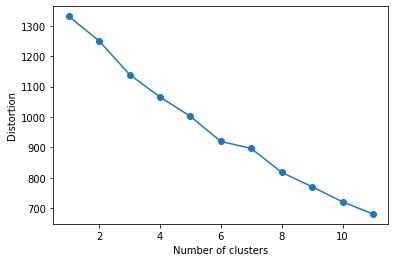

In [47]:
elbow_method(X_commits, 1,12)

## Para k=11

In [48]:
kmeans_dados_reais = KMeans(11)
kmeans_dados_reais.fit(X_commits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
identified_clusters_dados_reais = kmeans_dados_reais.fit_predict(X_commits)
identified_clusters_dados_reais

array([ 7,  5,  6,  4, 10,  5,  0,  9,  2,  3,  4,  3,  4,  1,  4,  2,  2,
        4,  9,  2,  4,  4,  9,  9,  2,  2,  2,  9,  8,  9,  1,  4,  4,  9,
        4,  2,  2], dtype=int32)

In [50]:
data_with_clusters_dados_reais = df_files_commits_real.copy()
data_with_clusters_dados_reais['cluster'] = identified_clusters_dados_reais
data_with_clusters_dados_reais[['file', 'cluster']].sort_values(['cluster'])

,file,cluster
6,Config.java,0
13,MessagingService.java,1
30,StatementRestrictions.java,1
24,ModificationStatement.java,2
19,SecondaryIndexTest.java,2
35,AlterTest.java,2
16,CQLTester.java,2
15,Gossiper.java,2
25,View.java,2
36,CreateViewStatement.java,2


## Mostra os grupos encontrados

In [51]:
list_of_clusters_dados_reais = list(data_with_clusters_dados_reais['cluster'])
list_of_clusters_dados_reais = list(set(list_of_clusters_dados_reais))
print(f'Grupos: {list_of_clusters_dados_reais}')

dictionary_of_clusters_dados_reais = mostra_grupos(list_of_clusters_dados_reais, data_with_clusters_dados_reais)

Grupos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
grupo 0 : ['Config.java']
grupo 1 : ['MessagingService.java', 'StatementRestrictions.java']
grupo 2 : ['SelectStatement.java', 'Gossiper.java', 'CQLTester.java', 'SecondaryIndexTest.java', 'ModificationStatement.java', 'View.java', 'CompactionStrategyManager.java', 'AlterTest.java', 'CreateViewStatement.java']
grupo 3 : ['LegacyLayout.java', 'NodeProbe.java']
grupo 4 : ['CompactionManager.java', 'SinglePartitionReadCommand.java', 'ReadCommand.java', 'Instance.java', 'CFMetaData.java', 'ViewTest.java', 'SystemKeyspace.java', 'AbstractCluster.java', 'FBUtilities.java', 'SelectTest.java']
grupo 5 : ['ColumnFamilyStore.java', 'SSTableReader.java']
grupo 6 : ['DatabaseDescriptor.java']
grupo 7 : ['StorageService.java']
grupo 8 : ['ColumnIndex.java']
grupo 9 : ['CassandraDaemon.java', 'SchemaKeyspace.java', 'StorageServiceMBean.java', 'SASIIndexTest.java', 'DataResolver.java', 'Keyspace.java', 'QueryProcessor.java']
grupo 10 : ['StorageProxy.java']


## Dataframe com os 100 arquivos mais modificados na versão 3.11.11 do Cassandra

In [53]:
filepath = util_designite.PATH_ARQUIVOS_MODIFICADOS_V_3_11_11 + '/' + 'df_100_arquivos_mais_modificados.csv'
df_100_arquivos_mais_modificados = pd.read_csv(filepath, sep=',')
colunas = ['name', 'hash', 'date', 'modifications', 'nloc', 'complexity']
df_100_arquivos_mais_modificados[colunas]

,name,hash,date,modifications,nloc,complexity
0,StorageService.java,6bad57fc3cf967838a220d8402db37ed9a5b3b4e,2015-11-11 15:02:26,65,3306.0,717.0
1,StorageService.java,6bb6bb005197c33fa94026d472ff78d4f36613cc,2015-11-11 15:04:25,65,3302.0,703.0
2,StorageService.java,9a90e9894e9e079058876cf2b16a47d29ba0a32a,2015-11-11 15:05:35,61,3344.0,718.0
3,StorageService.java,ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb,2015-11-10 17:22:11,6,3311.0,718.0
4,StorageService.java,a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7,2015-10-29 12:36:32,3,3314.0,719.0
5,StorageService.java,99b82dbb43277035562e7b82bb9bdebd84510e96,2015-11-10 13:08:05,9,3311.0,705.0
6,StorageService.java,ae315b5ec944571342146867c51b2ceb50f3845e,2015-11-16 15:48:33,9,3351.0,720.0
7,StorageService.java,7650fc196341bd673626054593f2ce6e895d7783,2015-11-27 13:49:15,32,3333.0,726.0
8,StorageService.java,51753263a4c4d50c5bbe7bb80636cca5b6458ecf,2015-12-01 10:41:05,14,3333.0,726.0
9,StorageService.java,15f03ab446854cf4d2999c3785d145c89bc3a3e4,2015-11-25 16:45:02,19,3319.0,710.0


## Mostra as alterações do grupo 9 : ['CassandraDaemon.java', 'SchemaKeyspace.java', 'StorageServiceMBean.java', 'SASIIndexTest.java', 'DataResolver.java', 'Keyspace.java', 'QueryProcessor.java']

In [54]:
for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'CassandraDaemon.java' or row['name'] == 'SchemaKeyspace.java' or row['name'] == 'StorageServiceMBean.java' or row['name'] == 'SASIIndexTest.java' or row['name'] =='DataResolver.java' or row['name'] =='Keyspace.java' or row['name'] =='QueryProcessor.java':
    print(row['name'], row['hash'])

CassandraDaemon.java bd46463fbb7d6b0998c837450ce61df13eda041d
CassandraDaemon.java 879c49bb7d28946187a04e5cd76236d652825579
CassandraDaemon.java a4da379bb042fcf171a560af5edd9e785d6f8e4e
CassandraDaemon.java dff2214595c5e2b0b8f3781186df55bd90c6728c
CassandraDaemon.java 11910c6c9206407c2de60f38566120bddde79eba
CassandraDaemon.java db68ac9fd791d777df0241ef9bd381eca46bbd20
CassandraDaemon.java 21448c50891642f95097a9e5ed0a3802bd90a877
CassandraDaemon.java 7afc1571bb465ba45572f849e6f285182b6c1e7d
CassandraDaemon.java 7b0c7164aa22c156811a5d1a001c43d099aad8e4
CassandraDaemon.java 30789036330e84f41630a80171fd24835cacaf2d
CassandraDaemon.java 93c5bc616e21ffa7f31266ad095ca374f2ba73a4
CassandraDaemon.java 1dd33eca1b72e6cf1261471f88e7c3990be3f097
CassandraDaemon.java c17cbe1875a974a00822ffbfad716abde363c8da
CassandraDaemon.java b851792c4e3ae32b8d863d9079cca6d135f1cf23
CassandraDaemon.java 360541f16a158f560d7cce1fcc264e246a80d10f
CassandraDaemon.java e31e216234c6b57a531cae607e0355666007deb2
Cassandr

## Continua...

In [57]:
dictionary_commist_em_comum = {}
lista_auxiliar = []

for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'CassandraDaemon.java':
    lista_auxiliar.append(row['hash'])
    dictionary_commist_em_comum['CassandraDaemon.java'] = lista_auxiliar

lista_auxiliar = []
for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'SchemaKeyspace.java':
    lista_auxiliar.append(row['hash'])
    dictionary_commist_em_comum['SchemaKeyspace.java'] = lista_auxiliar

lista_commits_em_comum = []

for item1 in dictionary_commist_em_comum['CassandraDaemon.java']:
  if item1 in dictionary_commist_em_comum['SchemaKeyspace.java']:
    lista_commits_em_comum.append(item1)
  
print("Os arquivos 'CassandraDaemon.java', 'SchemaKeyspace.java' aparecem juntos nos seguintes commits:")
print(lista_commits_em_comum)

Os arquivos 'CassandraDaemon.java', 'SchemaKeyspace.java' aparecem juntos nos seguintes commits:
['e31e216234c6b57a531cae607e0355666007deb2', '9797511c56df4e9c7db964a6b83e67642df96c2d', 'ffab2b8dde0c7c40080c1c0b36831edd6965a042']
